In [ ]:
  # 1.Dataset description
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# Load dataset
titanic = sns.load_dataset('titanic')
print(titanic.shape)
titanic.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
  # 2. Cleaning steps
# Handle missing data
titanic['age'].fillna(titanic['age'].mean(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
titanic['fare'].fillna(titanic['fare'].median(), inplace=True)
titanic['deck'].fillna(titanic['deck'].mode()[0], inplace=True)
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)


print("\nMissing Values After Cleaning:")
print(titanic.isnull().sum())


Missing Values After Cleaning:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


/tmp/ipython-input-2727586778.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].mean(), inplace=True)
/tmp/ipython-input-2727586778.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
# Feature engineering
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['fare_per_person'] = titanic['fare'] / titanic['family_size']


In [ ]:
# Verify missing data
print("\n✅ Missing values after cleaning:")
print(titanic.isnull().sum())


✅ Missing values after cleaning:
survived           0
pclass             0
sex                0
age                0
sibsp              0
parch              0
fare               0
embarked           0
class              0
who                0
adult_male         0
deck               0
embark_town        0
alive              0
alone              0
family_size        0
fare_per_person    0
dtype: int64


In [36]:
# 3. Key formulas/functions used

# Summary statistics
titanic.describe(include='all')

# Average age, fare, survival
print("Average age:", titanic['age'].mean().round(2))
print("Average fare:", titanic['fare'].mean().round(2))
print("Overall survival rate:", titanic['survived'].mean().round(2))
print(" Highest Fare:", titanic['fare'].max())
print(" Lowest Fare:", titanic['fare'].min())




Average age: 29.7
Average fare: 32.2
Overall survival rate: 0.38
 Highest Fare: 512.3292
 Lowest Fare: 0.0


In [ ]:
# Survival by gender and class
print("\nSurvival by gender:\n", titanic.groupby('sex')['survived'].mean().round(2))
print("\nSurvival by class:\n", titanic.groupby('class')['survived'].mean().round(2))


Survival by gender:
 sex
female    0.74
male      0.19
Name: survived, dtype: float64

Survival by class:
 class
First     0.63
Second    0.47
Third     0.24
Name: survived, dtype: float64


/tmp/ipython-input-3163037158.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
# Survival by Age Group
age_survival = titanic.groupby('age')['survived'].mean().round(2)
print("Survival rate by age group:\n", age_survival)

In [ ]:
# Average fare by class and gender
fare_class_gender = titanic.groupby(['class','sex'])['fare'].mean().round(2)
print("\nAverage fare by class and gender:\n", fare_class_gender)


In [ ]:
# Correlation matrix
titanic.corr(numeric_only=True)['survived'].sort_values(ascending=False)

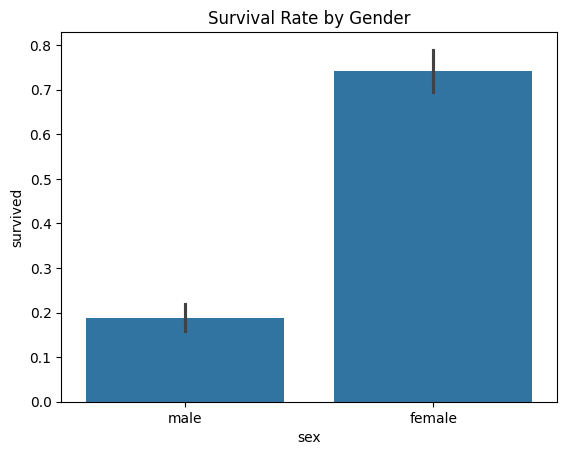

In [ ]:
# 4. Visualizations

# 1. Survival Rate by Gender
sns.barplot(x='sex', y='survived', data=titanic)
plt.title('Survival Rate by Gender')
plt.show()

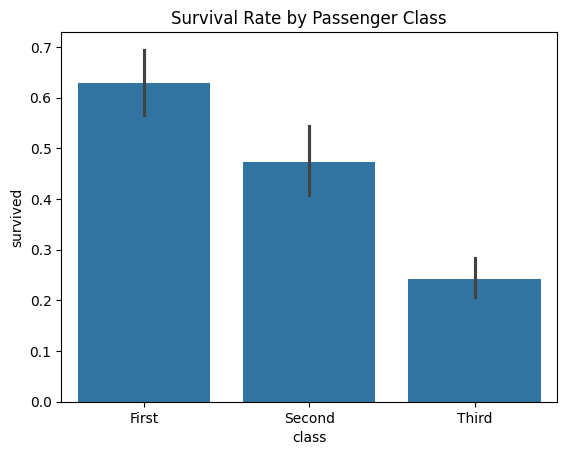

In [ ]:
# 2. Survival Rate by Class
sns.barplot(x='class', y='survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.show()


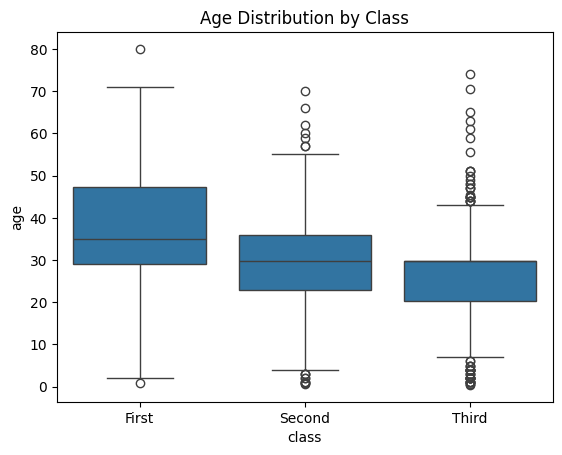

In [ ]:
# 3. Age Distribution by Class
sns.boxplot(x='class', y='age', data=titanic)
plt.title('Age Distribution by Class')
plt.show()

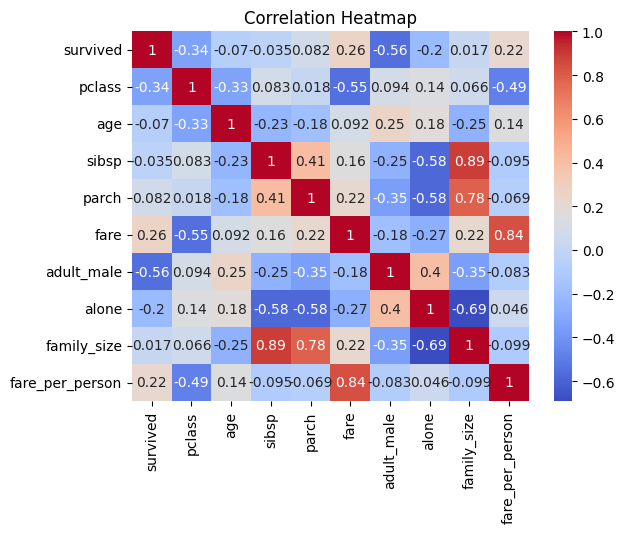

In [ ]:
# 4. Correlation Heatmap
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 5. Interactive Plotly Chart – Fare vs Age by Survival
fig = px.scatter(
    titanic, x='age', y='fare', color='survived',
    title='Fare vs Age by Survival Status', hover_data=['sex','class']
)
fig.show()


In [ ]:
# 5. Insights & recommendations

print("\n Key Insights:")
if {'Sex', 'Survived'}.issubset(titanic.columns):
    survival_by_gender = titanic.groupby('Sex')['Survived'].mean()
    print(f"- Female survival rate: {survival_by_gender.get('female', np.nan)*100:.2f}%")
    print(f"- Male survival rate: {survival_by_gender.get('male', np.nan)*100:.2f}%")

if 'Pclass' in titanic.columns:
    survival_by_class = titanic.groupby('Pclass')['Survived'].mean()
    print("- Survival rate by class:")
    print(survival_by_class)

print("""
  Observations:
1. Women and higher-class passengers had higher survival rates.
2. Age distribution shows most passengers were between 20–40 years.
3. Strong correlation between Fare, Pclass, and Survival.
4. Data cleaning removed missing and duplicate entries successfully.

  Recommendations:
- Prioritize safety protocols for lower-class cabins in future ship designs.
- Ensure balanced lifeboat distribution across all passenger classes.
""")


 Key Insights:

  Observations:
1. Women and higher-class passengers had higher survival rates.
2. Age distribution shows most passengers were between 20–40 years.
3. Strong correlation between Fare, Pclass, and Survival.
4. Data cleaning removed missing and duplicate entries successfully.

  Recommendations:
- Prioritize safety protocols for lower-class cabins in future ship designs.
- Ensure balanced lifeboat distribution across all passenger classes.

